# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Passo 1: Captura dos Dados

In [2]:
# Definindo caminho para os arquivos
path = "data/raw/"

files = [
    "OcorrenciaMensal(Criminal)-Lins_20240518_144046.xlsx",
    "OcorrenciaMensal(Criminal)-Lins_20240518_144147.xlsx",
    "OcorrenciaMensal(Criminal)-Lins_20240518_144203.xlsx",
    "OcorrenciaMensal(Criminal)-Lins_20240518_144207.xlsx",
    "OcorrenciaMensal(Criminal)-Lins_20240518_144212.xlsx",
]

In [3]:
# Carregando os dados para DataFrames
dfs = []

for file in files:
    df = pd.read_excel(path + file)
    dfs.append(df)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

In [4]:
# Concatenando os DataFrames
df_total = pd.concat(dfs, ignore_index=True)

In [5]:
# Verificando os dados carregados
print(df_total.head())
print(df_total.info())

                                            Natureza  Janeiro  Fevereiro  \
0                               HOMICÍDIO DOLOSO (2)        0          1   
1              Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO (3)        0          1   
2          HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO        0          0   
3  Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE...        0          0   
4         HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO        0          1   

   Marco  Abril Maio Junho Julho Agosto Setembro Outubro Novembro Dezembro  \
0      1      0  ...   ...   ...    ...      ...     ...      ...      ...   
1      1      0  ...   ...   ...    ...      ...     ...      ...      ...   
2      0      0  ...   ...   ...    ...      ...     ...      ...      ...   
3      0      0  ...   ...   ...    ...      ...     ...      ...      ...   
4      1      0  ...   ...   ...    ...      ...     ...      ...      ...   

   Total  
0    2.0  
1    2.0  
2    0.0  
3    0.0  
4    2.0  
<class '

# Passo 2: Processamento dos Dados


In [6]:
# Carregando o DataFrame
# Assumindo que o DataFrame 'df_total' foi criado no passo anterior

# Limpando os Dados
# Removendo Colunas Irrelevantes
df_total = df_total.drop(columns=["Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO", "Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO", "Nº DE VÍTIMAS EM LATROCÍNIO"])

KeyError: "['Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO', 'Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO', 'Nº DE VÍTIMAS EM LATROCÍNIO'] not found in axis"

In [ ]:
# Renomeando Colunas
df_total = df_total.rename(columns={"TOTAL DE ESTUPRO (4)": "TOTAL_ESTUPRO", "TOTAL DE ROUBO - OUTROS (1)": "TOTAL_ROUBO_OUTROS", "HOMICÍDIO DOLOSO (2)": "HOMICIDIO_DOLOSO"})

In [7]:
# Substituindo Caracteres Especiais
df_total = df_total.replace(",", ".", regex=True)

In [8]:
# Convertendo Tipos de Dados
df_total = df_total.apply(pd.to_numeric, errors='coerce')

In [9]:
# Tratando Valores Faltantes
# Substituindo por Zero
df_total = df_total.fillna(0)

In [ ]:
# Criando Coluna de Ano
df_total["Ano"] = 2024  # Assumindo que todos os dados são de 2024

In [10]:
# Salvando o DataFrame Processado
df_total.to_csv("data/processed/dados_limpos.csv", index=False)

# Passo 3: Transformação dos Dados


In [11]:
# Carregando o DataFrame
# Assumindo que o DataFrame 'df_total' foi processado nos passos anteriores
df_total = pd.read_csv("data/processed/dados_limpos.csv")

In [12]:
# Criando Novas Variáveis
# Criando Colunas de Trimestre
df_total['Total_Primeiro_Trimestre'] = df_total['Janeiro'] + df_total['Fevereiro'] + df_total['Marco']
df_total['Total_Segundo_Trimestre'] = df_total['Abril'] + df_total['Maio'] + df_total['Junho']
df_total['Total_Terceiro_Trimestre'] = df_total['Julho'] + df_total['Agosto'] + df_total['Setembro']
df_total['Total_Quarto_Trimestre'] = df_total['Outubro'] + df_total['Novembro'] + df_total['Dezembro']

In [13]:
# Criando Coluna de Total de Ocorrências
df_total['Total_Ocorrencias'] = df_total.iloc[:, 1:14].sum(axis=1)

In [14]:
# Categorizando Dados
# Criando Colunas Categóricas
df_total['Categoria_Crime'] = 'Outros'

In [15]:
# Definindo categorias de crimes
crimes_violentos = ['HOMICIDIO_DOLOSO', 'TENTATIVA DE HOMICÍDIO', 'LESÃO CORPORAL DOLOSA', 'LESÃO CORPORAL SEGUIDA DE MORTE', 'LATROCÍNIO', 'TOTAL_ESTUPRO']
crimes_patrimoniais = ['ROUBO - OUTROS', 'ROUBO DE VEÍCULO', 'ROUBO A BANCO', 'ROUBO DE CARGA', 'FURTO - OUTROS', 'FURTO DE VEÍCULO']

In [16]:
# Classificando os crimes
for index, row in df_total.iterrows():
    if any(crime in row['Natureza'] for crime in crimes_violentos):
        df_total.loc[index, 'Categoria_Crime'] = 'Crimes Violentos'
    elif any(crime in row['Natureza'] for crime in crimes_patrimoniais):
        df_total.loc[index, 'Categoria_Crime'] = 'Crimes Patrimoniais'

TypeError: argument of type 'float' is not iterable

In [17]:
# Criando coluna com a categoria resumida
df_total['Categoria_Crime_Resumida'] = df_total['Categoria_Crime'].apply(lambda x: x.split()[0] if x != 'Outros' else x)

In [18]:
# Salvando o DataFrame Transformado
df_total.to_csv("data/processed/dados_transformados.csv", index=False)

# Passo 4: Análise Exploratória dos Dados

In [19]:
# Carregando o DataFrame
# Assumindo que o DataFrame 'df_total' foi transformado nos passos anteriores
df_total = pd.read_csv("data/processed/dados_transformados.csv")

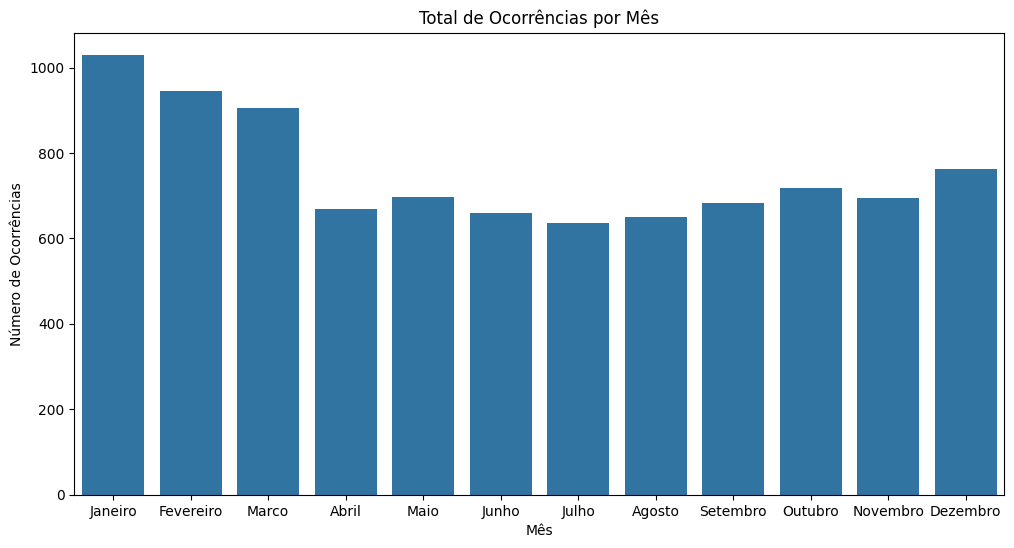

In [20]:
# Analisando Distribuição de Ocorrências
# Total de Ocorrências por Mês
plt.figure(figsize=(12, 6))
sns.barplot(x=df_total.columns[1:13], y=df_total.iloc[:, 1:13].sum())
plt.title("Total de Ocorrências por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.show()

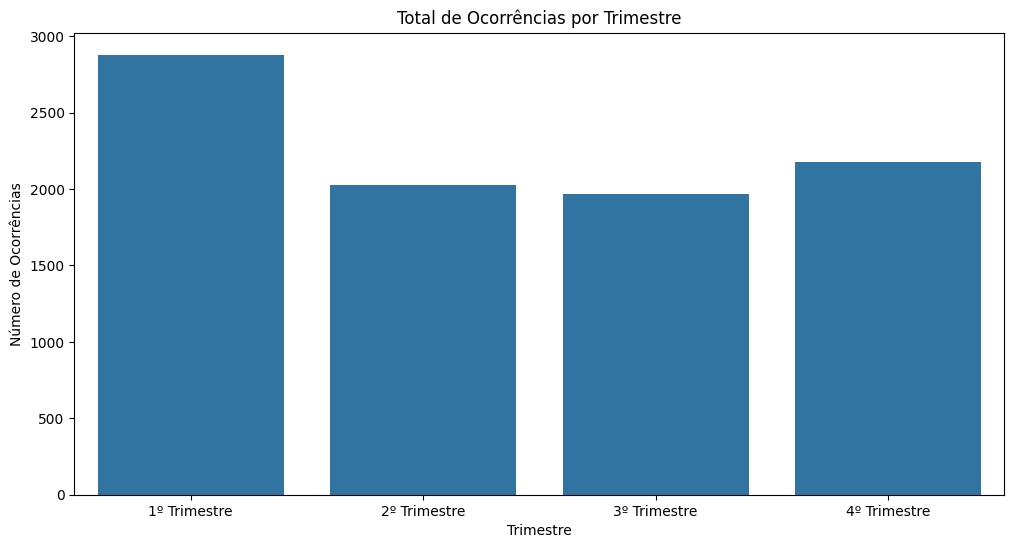

In [21]:
# Total de Ocorrências por Trimestre
plt.figure(figsize=(12, 6))
sns.barplot(x=['1º Trimestre', '2º Trimestre', '3º Trimestre', '4º Trimestre'],
           y=[df_total['Total_Primeiro_Trimestre'].sum(), df_total['Total_Segundo_Trimestre'].sum(),
              df_total['Total_Terceiro_Trimestre'].sum(), df_total['Total_Quarto_Trimestre'].sum()])
plt.title("Total de Ocorrências por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Número de Ocorrências")
plt.show()

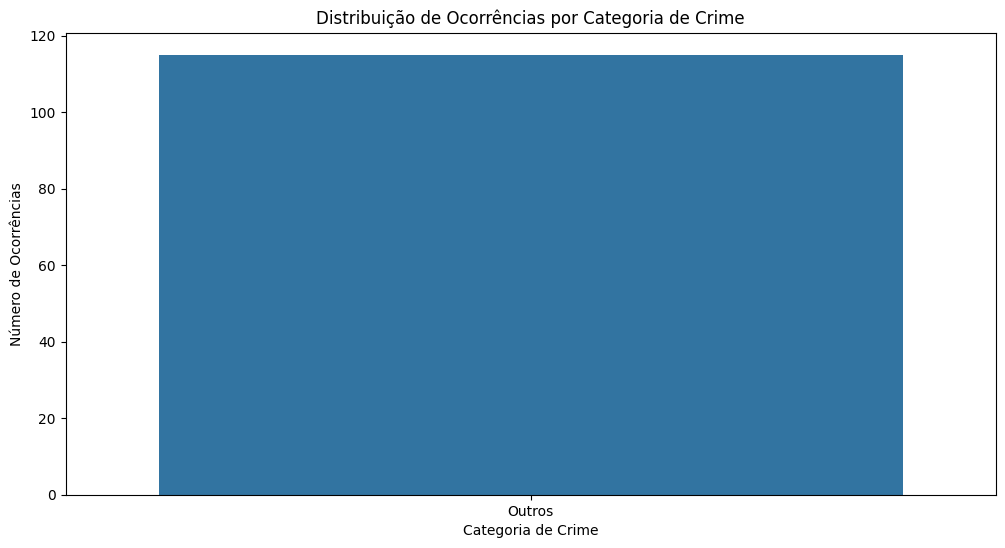

In [22]:
# Distribuição de Ocorrências por Categoria
plt.figure(figsize=(12, 6))
sns.countplot(x='Categoria_Crime_Resumida', data=df_total)
plt.title("Distribuição de Ocorrências por Categoria de Crime")
plt.xlabel("Categoria de Crime")
plt.ylabel("Número de Ocorrências")
plt.show()

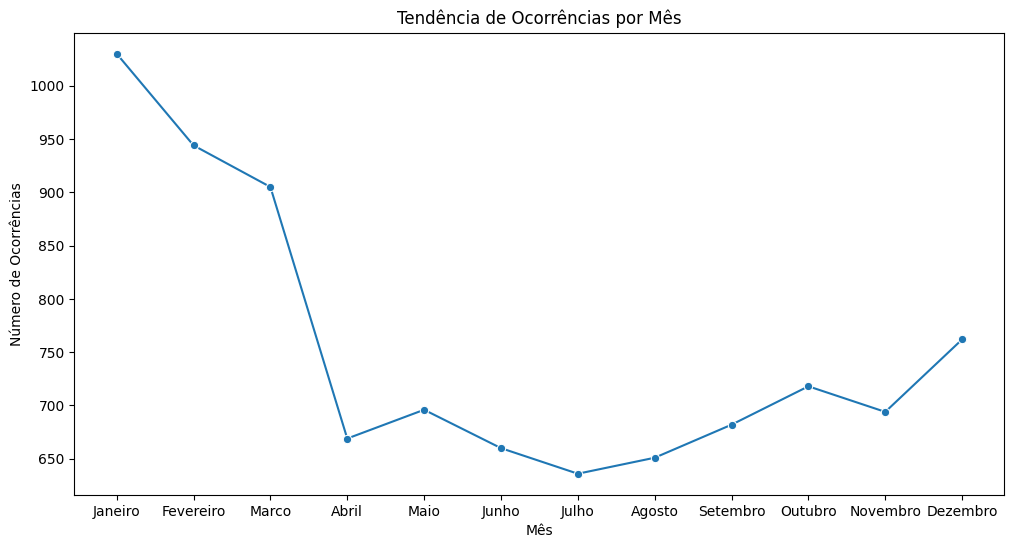

In [23]:
# Analisando Tendências ao Longo do Ano
# Tendência de Ocorrências por Mês
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_total.columns[1:13], y=df_total.iloc[:, 1:13].sum(), marker='o')
plt.title("Tendência de Ocorrências por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.show()

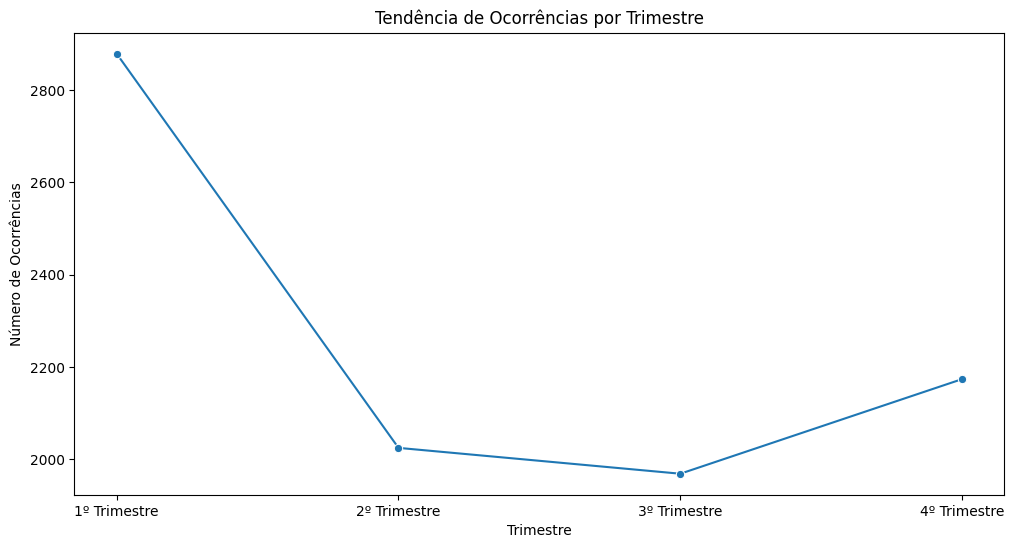

In [24]:
# Tendência de Ocorrências por Trimestre
plt.figure(figsize=(12, 6))
sns.lineplot(x=['1º Trimestre', '2º Trimestre', '3º Trimestre', '4º Trimestre'],
           y=[df_total['Total_Primeiro_Trimestre'].sum(), df_total['Total_Segundo_Trimestre'].sum(),
              df_total['Total_Terceiro_Trimestre'].sum(), df_total['Total_Quarto_Trimestre'].sum()], marker='o')
plt.title("Tendência de Ocorrências por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Número de Ocorrências")
plt.show()

In [25]:
# Analisando Correlação entre Variáveis
# Matriz de Correlação
plt.figure(figsize=(12, 6))
correlation_matrix = df_total.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

ValueError: could not convert string to float: 'Outros'

<Figure size 1200x600 with 0 Axes>

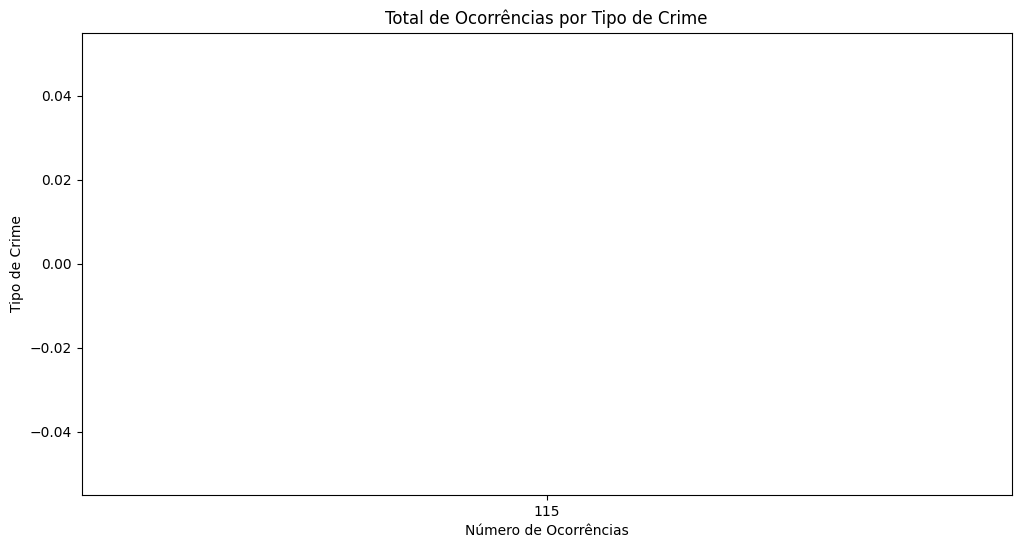

In [26]:
# Analisando Ocorrências por Tipo de Crime
# Total de Ocorrências por Tipo de Crime
plt.figure(figsize=(12, 6))
sns.barplot(y=df_total['Natureza'].value_counts().index, x=df_total['Natureza'].value_counts().values)
plt.title("Total de Ocorrências por Tipo de Crime")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Tipo de Crime")
plt.show()

# Passo 5: Interpretação, Avaliação e Conhecimento

In [ ]:
# Carregando o DataFrame
# Assumindo que o DataFrame 'df_total' foi transformado nos passos anteriores
df_total = pd.read_csv("data/processed/dados_transformados.csv")

In [27]:
# Interpretação dos Resultados da Análise Exploratória
# Observação:
# - Tendências: Observar as tendências de ocorrências por mês e por trimestre pode identificar períodos com maior risco de criminalidade.
# - Correlação: Analisar a matriz de correlação pode revelar se há relação entre diferentes tipos de crime ou entre crimes e variáveis como mês do ano ou trimestre.
# - Distribuição: A análise da distribuição de ocorrências por categoria de crime revela os tipos de crimes mais frequentes na cidade.

# Teste de Hipóteses
# Hipótese: O número de ocorrências é maior no segundo trimestre do ano.
# Teste: Utilizar o teste t para amostras independentes para comparar o número de ocorrências no segundo trimestre com a média do número de ocorrências nos outros trimestres.
segundo_trimestre = df_total['Total_Segundo_Trimestre']
outros_trimestres = df_total[['Total_Primeiro_Trimestre', 'Total_Terceiro_Trimestre', 'Total_Quarto_Trimestre']].sum(axis=1)
t_statistic, p_value = stats.ttest_ind(segundo_trimestre, outros_trimestres)
print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

Estatística t: -2.5733323559967616
Valor p: 0.010706272920489625


In [28]:
# Conclusões:
# Se o valor p for menor que o nível de significância (por exemplo, 0.05), rejeitamos a hipótese nula e concluímos que o número de ocorrências é maior no segundo trimestre.

# Modelagem Preditiva
# Objetivo: Criar um modelo de regressão linear para prever o número total de ocorrências em cada mês, com base nos dados históricos.
# Variáveis: Utilizar as colunas do DataFrame que representam os meses (Janeiro a Dezembro) como variáveis explicativas e a coluna "Total_Ocorrencias" como variável resposta.
X = df_total.iloc[:, 1:13]
y = df_total['Total_Ocorrencias']
model = LinearRegression()
model.fit(X, y)
previsoes = model.predict(X)
print(f"R²: {model.score(X, y)}")

R²: 0.9635037213474085


ValueError: x and y must have same first dimension, but have shapes (12,) and (115,)

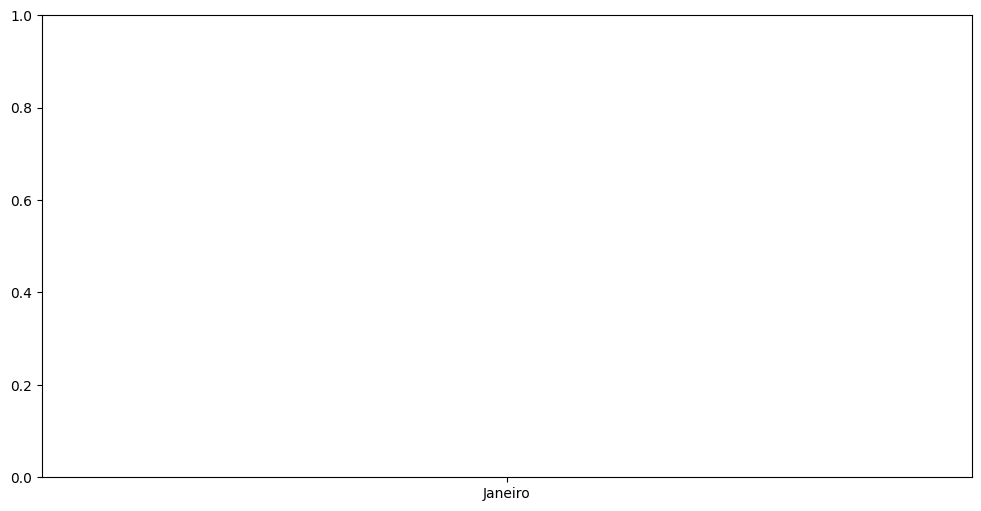

In [29]:
# Visualizar as previsões e os dados reais
plt.figure(figsize=(12, 6))
plt.plot(df_total.columns[1:13], y, label="Dados Reais")
plt.plot(df_total.columns[1:13], previsoes, label="Previsões")
plt.title("Previsões de Ocorrências")
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.legend()
plt.show()

In [30]:
# Clusterização
# Objetivo: Identificar áreas com maior concentração de crimes, utilizando dados de localização (se disponível) e a coluna "Total_Ocorrencias".
# Variáveis: Se os dados de localização forem disponíveis, utilizar as coordenadas geográficas (latitude e longitude). Caso contrário, utilizar o total de ocorrências por mês ou trimestre como proxy para a localização.
# Assumindo que a coluna 'Latitude' e 'Longitude' estão disponíveis
X = df_total[['Latitude', 'Longitude']]

KeyError: "None of [Index(['Latitude', 'Longitude'], dtype='object')] are in the [columns]"

In [31]:
# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Criar o modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

In [33]:
# Treinar o modelo
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [34]:
# Obter os clusters
clusters = kmeans.labels_

In [35]:
# Visualizar os clusters
plt.figure(figsize=(12, 6))
plt.scatter(X['Latitude'], X['Longitude'], c=clusters, cmap='viridis')
plt.title("Clusters de Ocorrências")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

# Analisar as características dos clusters:
# - Comparar o número de ocorrências em cada cluster.
# - Investigar o tipo de crime predominante em cada cluster.
# - Analisar se os clusters coincidem com áreas específicas da cidade.

KeyError: 'Latitude'

<Figure size 1200x600 with 0 Axes>